<a href="https://colab.research.google.com/github/nkstephe/eas503/blob/master/Copy_of_Python_Fantasy_Football_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
#!pip install sklearn

#Importing the packages needed for visuals and analysis

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk

In [ ]:
#Importing the data from csv files for the QB, RB, and WR positions

qbdata = pd.read_csv(r'C:\Users\nates\Desktop\MPS Program\CDA 501 Int. Data Driven Analysis\Python Project\qb_stats_and_projections.csv')
qbdf = pd.DataFrame(qbdata)

rbdata = pd.read_csv(r'C:\Users\nates\Desktop\MPS Program\CDA 501 Int. Data Driven Analysis\Python Project\rb_stats_and_projections.csv')
rbdf = pd.DataFrame(rbdata)

wrdata = pd.read_csv(r'C:\Users\nates\Desktop\MPS Program\CDA 501 Int. Data Driven Analysis\Python Project\wr_stats_and_projections.csv')
wrdf = pd.DataFrame(wrdata)

print(rbdf)




FileNotFoundError: ignored

In [ ]:
    #Drops unnecessary columns that are categorical and don't relate to the question being solved   
    
    qbclean = qbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', '2020 OUTLOOK'], axis=1)
    #print(qbclean)
    
    
    rbclean = rbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', 'Player OUTLOOK'], axis=1)
    #print(rbclean)
    
    
    wrclean = wrdf.drop(['Unnamed: 0', 'TEAM', 'POSITION', '2020 PLAYER OUTLOOK'], axis=1)
    #print(wrclean)

In [ ]:
    #Drops rows that have Null values
    qbclean = qbclean.dropna()
    #print(qbclean)
    
    rbclean = rbclean.dropna()
    #print(rbclean)
    
    wrclean = wrclean.dropna()
    print(wrclean)

          PLAYER NAME  2019 TAR  2019 REC  2019 REC YARDS  2019 AVG REC YARDS  \
0      Michael Thomas     185.0     149.0          1725.0                11.6   
1     DeAndre Hopkins     150.0     104.0          1165.0                11.2   
2         Julio Jones     157.0      99.0          1394.0                14.1   
3        Chris Godwin     120.0      86.0          1333.0                15.5   
4       Davante Adams     127.0      83.0           997.0                12.0   
..                ...       ...       ...             ...                 ...   
195     Da'Mari Scott       3.0       2.0            22.0                11.0   
196      Trevor Davis      11.0       8.0           111.0                13.9   
197  Darrius Shepherd       2.0       1.0             1.0                 1.0   
198   Trent Sherfield      12.0       4.0            80.0                20.0   
199    DeAndrew White       9.0       4.0            51.0                12.8   

     2019 REC TDS  2019 RUS

In [ ]:
    #Removes rows that are all zeros
    
    qbclean = qbclean.loc[~(qbclean==0).any(axis=1)]
    #print(qbclean)
    
    rbclean = rbclean.loc[~(rbclean==0).any(axis=1)]
    #print(rbclean)
    
    wrclean = wrclean.loc[~(wrclean==0).all(axis=1)]
    print(wrclean)

          PLAYER NAME  2019 TAR  2019 REC  2019 REC YARDS  2019 AVG REC YARDS  \
0      Michael Thomas     185.0     149.0          1725.0                11.6   
1     DeAndre Hopkins     150.0     104.0          1165.0                11.2   
2         Julio Jones     157.0      99.0          1394.0                14.1   
3        Chris Godwin     120.0      86.0          1333.0                15.5   
4       Davante Adams     127.0      83.0           997.0                12.0   
..                ...       ...       ...             ...                 ...   
195     Da'Mari Scott       3.0       2.0            22.0                11.0   
196      Trevor Davis      11.0       8.0           111.0                13.9   
197  Darrius Shepherd       2.0       1.0             1.0                 1.0   
198   Trent Sherfield      12.0       4.0            80.0                20.0   
199    DeAndrew White       9.0       4.0            51.0                12.8   

     2019 REC TDS  2019 RUS

In [ ]:
    #Gives descriptive statistics of the data
    
    qbcleandes = qbclean.describe()
    print(qbcleandes)
    
    rbcleandes = rbclean.describe()
    #print(rbcleandes)
    
    wrcleandes = wrclean.describe()
    #print(wrcleandes)

       2019 COMPLETED PASS  2019 ATTEMPTED PASS  2019 PASSING YDS  \
count            22.000000            22.000000         22.000000   
mean            326.000000           503.409091       3724.363636   
std              50.566317            85.086320        583.729842   
min             201.000000           286.000000       2742.000000   
25%             289.750000           459.500000       3129.750000   
50%             327.500000           507.500000       3839.500000   
75%             359.000000           562.250000       4050.250000   
max             408.000000           626.000000       4902.000000   

       2019 PASSING TD   2019 INT    2019 CAR  2019 RUSH YDS  2019 RUSH TD  \
count        22.000000  22.000000   22.000000      22.000000     22.000000   
mean         24.500000   9.772727   54.318182     248.318182      2.954545   
std           4.437395   4.363614   36.011091     260.881361      2.192569   
min          17.000000   4.000000    9.000000      -4.000000      

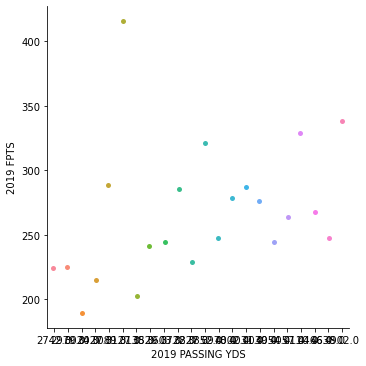

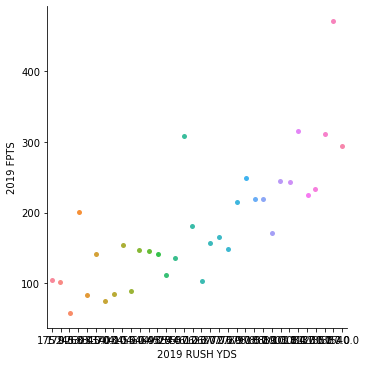

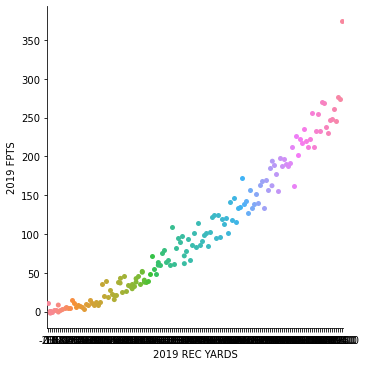

In [ ]:
    #Scatterplot that does work
    
    sns.catplot(x='2019 PASSING YDS', y='2019 FPTS', data=qbclean)
    
    sns.catplot(x='2019 RUSH YDS', y='2019 FPTS', data=rbclean)
    
    sns.catplot(x='2019 REC YARDS', y='2019 FPTS', data=wrclean)


In [ ]:
    #Logistic Regression
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    
    

SyntaxError: invalid syntax (<ipython-input-11-f22c2d0e871a>, line 3)

In [ ]:
    #QDA
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    

In [ ]:
    #Random Forests
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    

In [ ]:
    #Support Vector Machines
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    